# Lab 2.02 - Android Persistence

In [79]:
import pandas as pd
import seaborn as sns

ap = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/android_persistence_cpu.csv', delimiter=';')

# Kwalitatieve waarden omzetten naar categorische waarden.
ap['PersistenceType'] = ap['PersistenceType'].astype('category')
ap['DataSize'] = ap['DataSize'].astype('category')

Visualiseer `DataSize` en `PersistenceType` met een goed passend soort plot.

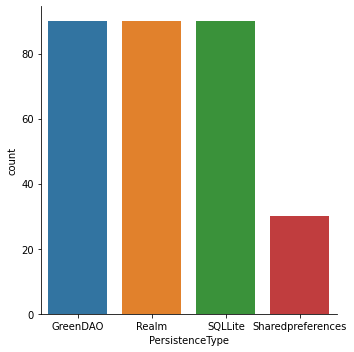

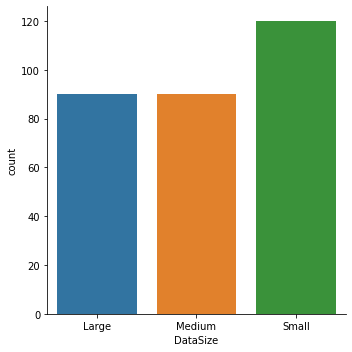

In [80]:
# Beide zijn kwalitatieve variabelen. Hiervoor kunnen we een histogram maken.
sns.catplot(data=ap, kind='count', x='PersistenceType')
sns.catplot(data=ap, kind='count', x='DataSize')

Toon het aantal voorkomens van  `DataSize` en `PersistenceType`. Zet `DataSize` tegenover het `PersistenceType` en probeer dit ook eens omgekeerd.

<AxesSubplot:xlabel='DataSize', ylabel='count'>

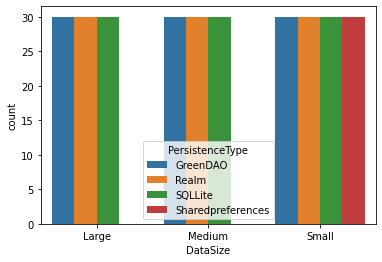

In [81]:
# Het aantal voorkomens van Persistentietype gegroepeerd op de datasize.
sns.countplot(data=ap, x='DataSize', hue='PersistenceType')

<AxesSubplot:xlabel='PersistenceType', ylabel='count'>

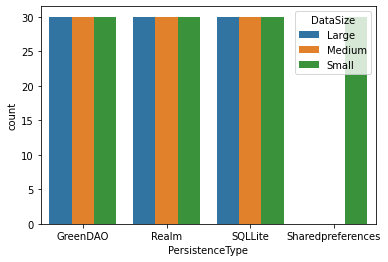

In [82]:
# De datasize gegroepeerd op type persistentie.
sns.countplot(data=ap, x='PersistenceType', hue='DataSize')

`Time` is een kwantitatieve variabele. Visualiseer deze variabele in drie stappen:

- Visualiseer enkel de `Time` variabele door dit mee te geven als parameter `x`.
- Groepeer de `Time` ten opzichte van de soort  `DataSize` door een `y` parameter mee te geven.
- Splits de waarden op op basis van het soort `PersistenceType` door gebruik te maken van de `hue` parameter.

<AxesSubplot:xlabel='Time'>

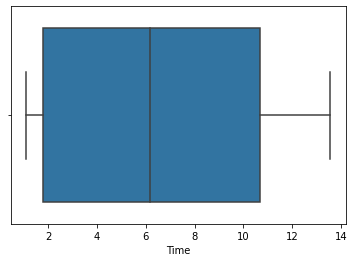

In [83]:
# 1. De variabele 'Time' over de gehele dataset.
sns.boxplot(data=ap, x='Time')

<AxesSubplot:xlabel='Time', ylabel='DataSize'>

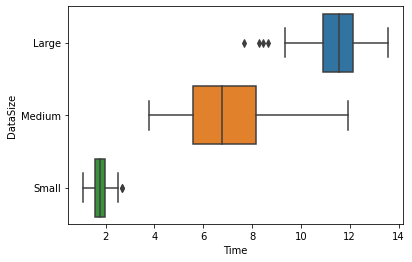

In [84]:
#2. De variabele 'Time' gegroepeerd per datasize.
sns.boxplot(data=ap, x='Time', y='DataSize')

<AxesSubplot:xlabel='Time', ylabel='DataSize'>

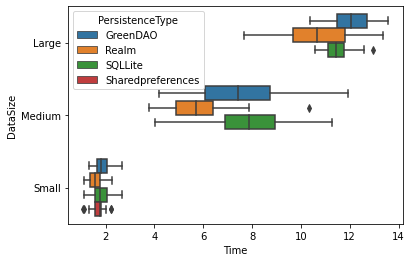

In [85]:
#3. De variabele 'Time' gegroepeerd per datasize en opgesplitst per persistentietype.
sns.boxplot(data=ap, x='Time', y='DataSize', hue='PersistenceType')

**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)

<AxesSubplot:xlabel='Time', ylabel='Density'>

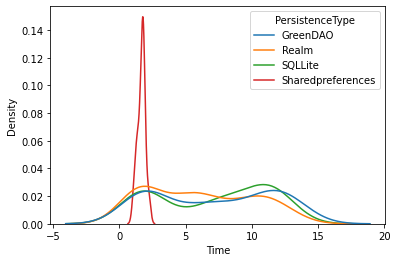

In [86]:

sns.kdeplot(data=ap, x='Time', hue='PersistenceType')

Bereken het gemiddelde en de standaardafwijking van `Time` op basis van drie verschillende criteria:

- Toon eerst het gemiddelde over de gehele dataset.
- Splits de gemiddelden en standaardafwijkingen op per `DataSize`
- Splits de gemiddelden en standaardafwijkingen op per `PersistenceType`
- Splits de gemiddelden en standaardafwijkingen op per `DataSize` & `PersistenceType`

De data moet gegroepeerd worden op basis van de variabele. Hiervoor moet je de groupby-methode gebruiken. Tussen de ronde haken geef je mee op basis van welke variabele je wilt groeperen. 

In [87]:
Tijd = ap.Time
print(f'Over de gehele dataset is het gemiddelde {Tijd.mean():.3f} en de standaardafwijking {Tijd.std():.3f}\n')

Over de gehele dataset is het gemiddelde 6.231 en de standaardafwijking 4.230



In [88]:
meanTijdDataSize = ap.groupby('DataSize')['Time'].mean()
stdTijdDataSize = ap.groupby('DataSize')['Time'].std()
print(f'De gemiddelde tijd bij kleine datasizes is {meanTijdDataSize.Small:.3f} en de standaardafwijking {stdTijdDataSize.Small:.3f}')
print(f'De gemiddelde tijd bij middelmatig datasizes is {meanTijdDataSize.Medium:.3f} en de standaardafwijking {stdTijdDataSize.Medium:.3f}')
print(f'De gemiddelde tijd bij grote datasizes is {meanTijdDataSize.Large:.3f} en de standaardafwijking {stdTijdDataSize.Large:.3f}\n')

De gemiddelde tijd bij kleine datasizes is 1.741 en de standaardafwijking 0.359
De gemiddelde tijd bij middelmatig datasizes is 7.022 en de standaardafwijking 1.864
De gemiddelde tijd bij grote datasizes is 11.426 en de standaardafwijking 1.164



In [89]:
meanTijdPersistencetype = ap.groupby('PersistenceType')['Time'].mean()
stdTijdPersistencetype = ap.groupby('PersistenceType')['Time'].std()
print(f'De tijd t.o.v. GreenDAO is het gemiddelde {meanTijdPersistencetype.GreenDAO:.3f} en de standaardafwijking {stdTijdPersistencetype.GreenDAO:.3f}')
print(f'De tijd t.o.v. Realm is het gemiddelde {meanTijdPersistencetype.Realm:.3f} en de standaardafwijking {stdTijdPersistencetype.Realm:.3f}')
print(f'De tijd t.o.v. SQLite is het gemiddelde {meanTijdPersistencetype.SQLLite:.3f} en de standaardafwijking {stdTijdPersistencetype.SQLLite:.3f}')

De tijd t.o.v. GreenDAO is het gemiddelde 7.153 en de standaardafwijking 4.386
De tijd t.o.v. Realm is het gemiddelde 6.023 en de standaardafwijking 3.884
De tijd t.o.v. SQLite is het gemiddelde 7.036 en de standaardafwijking 4.146


In [90]:
meanTijdDataSizePersistenceType = ap.groupby(['PersistenceType', 'DataSize'])['Time'].mean()
stdTijdDataSizePersistenceType = ap.groupby(['PersistenceType', 'DataSize'])['Time'].std()

## Verwachte resultaten

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
